In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plot

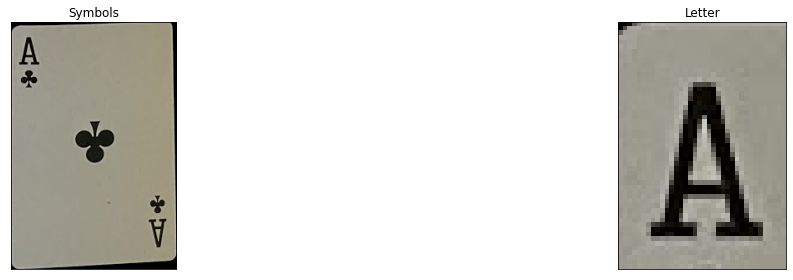

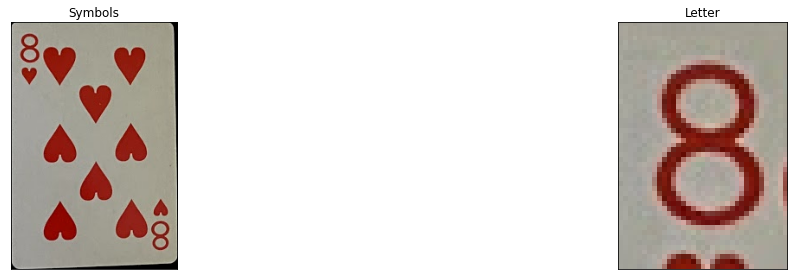

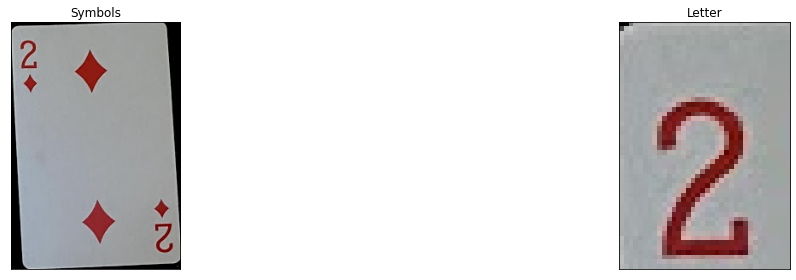

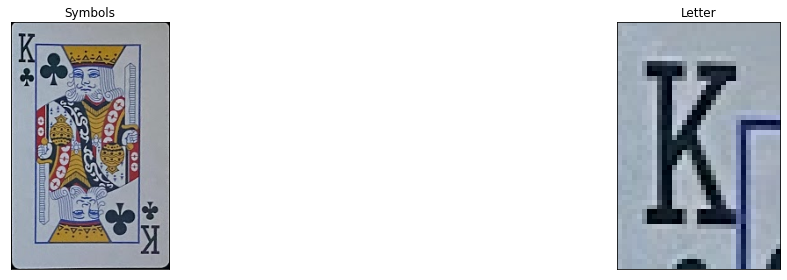

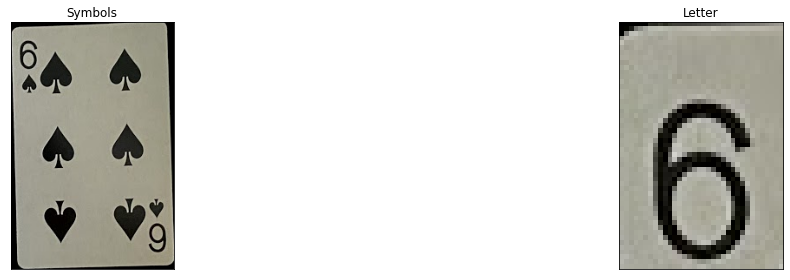

In [2]:
img = cv2.imread("blackcard1.jpg")
G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
T = 120
T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)
#inverse = cv2.bitwise_not(B)
C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
C = sorted(C, key=cv2.contourArea, reverse=True)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
i = 0

while i < 5:
  largestContour = C[i]

  x,y,w,h = cv2.boundingRect(largestContour)

  ROI = img[y:y+h,x:x+w]

  H,W,Channels = ROI.shape

  

  cropped_letter = ROI[6:int(H * 0.2), 3:int(W * 0.2)]

  #cropped_symbol = ROI[10:int(H * 0.2), 40:int(W * 0.2)]



  plot.figure(2, figsize=(20,10)) #plots each clicked cell beside the isolated version so it can be looked back over
  chosenCell = plot.subplot(221)
  chosenCell.set_title("Symbols")
  plot.imshow(ROI, cmap='gray'), plot.xticks([]),plot.yticks([])

  isolated = plot.subplot(222)
  isolated.set_title("Letter")
  plot.imshow(cropped_letter, cmap='gray'), plot.xticks([]),plot.yticks([])
  plot.show()

  i = i + 1



